모델 평가와 매개변수 선택을 통한 성능 향상

- 비지도 학습 모델 평가, 선택 작업은 매우 정성적인 작업이다. 
- 이번 학습에서는 지도학습인 회귀와 분류에 집중
- 지도학습 모델 평가를 위해 split 함수를 이용하여 데이터를 나누고 fit 메서드 적용 및 score 메서드를 이용

In [2]:
#위 과정의 예제 

from sklearn.datasets import make_blobs 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)

print('테스트 셋 점수 : ', logreg.score(X_test, y_test))

테스트 셋 점수 :  0.88


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


- 데이터를 훈련, 테스트 셋으로 나누는 이유는 지금까지 본 적 없는 새로운 데이터에 대해 모델이 일반화가 얼마나 잘되는지 측정하기 위해서이다. 

  (훈련 세트에 잘 맞는 것 보다, 학습 과정에 없던 데이터에 대해 예측을 잘하는 것이 더 중요 )
  
1) 교차검증

    - 일반화 성능을 재기 위해 훈련, 테스트 세트를 한번 나누는 것보다 뛰어난 통계적 평가 방법
    - 여러번 반복해서 데이터를 나누고 여러 모델을 학습한다. 
    - 가장 널리 이용되는 방법은 k-겹 교차검증(k-fold cross validation)
    - 여러 폴드로 나눈 후 테스트 셋과 데이터 셋을 번갈하가며 학습하여, 다섯개의 정확도를 획득

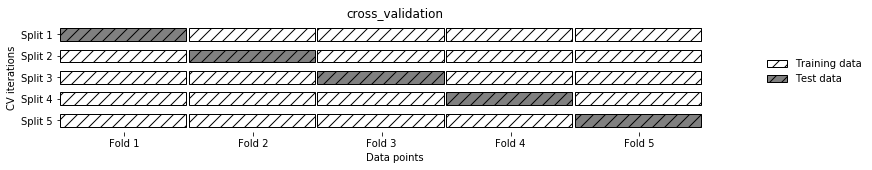

In [4]:
#k-fold 교차 검증의 과정
import mglearn

mglearn.plots.plot_cross_validation()

- 사이킷 런에서는 model_selection 모듈의 cross_val_score 함수로 구현되어 있다. 
- 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블이다.

In [5]:
#iris 데이터셋을 통한 예제
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수 :', scores)

교차 검증 점수 : [0.96078431 0.92156863 0.95833333]


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warn

- 사이킷 런의 교차검증의 폴드 기본값은 3이지만 cv매개변수를 이용하여 변경 가능

In [7]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print('교차 검증 점수 :', scores)

교차 검증 점수 : [1.         0.96666667 0.93333333 0.9        1.        ]


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

- 적어도 5겹 이상을 이용 하는 것이 좋고, 교차 검증의 정확도를 간단하게 나타내기 위해 평균을 이용

In [9]:
print('교차 검증 점수 :', scores.mean())

교차 검증 점수 : 0.9600000000000002


- 교차 검증의 평균값을 통해 이 모델의 정확도가 약 96%로 기대할 수 있다. 
- 각 폴드의 정확도의 차이가 큰 것은 모델이 훈련에 이용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문일 수 있다.
- 교차검증에 cross_validate 함수를 이용해 각 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리 획득 가능

   ( cross_val_score는 cross_validate에서 Test score만 반환 하는 것 )

In [10]:
from sklearn.model_selection import cross_validate 

res  = cross_validate(logreg, iris.data, iris.target, cv= 5, return_train_score=True)

display(res)

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

{'fit_time': array([0.00137496, 0.        , 0.00109029, 0.00045323, 0.0010469 ]),
 'score_time': array([0.        , 0.00097799, 0.0001564 , 0.00054431, 0.        ]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [14]:
#판다스를 이용하여 결괏값 출력 및 평균 계산
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간, 점수 :\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.001375,0.000000,1.000000,0.950000
1,0.000000,0.000978,0.966667,0.966667
2,0.001090,0.000156,0.933333,0.966667
3,0.000453,0.000544,0.900000,0.975000
4,0.001047,0.000000,1.000000,0.958333


평균 시간, 점수 :
 fit_time       0.000793
score_time     0.000336
test_score     0.960000
train_score    0.963333
dtype: float64


교차검증의 장점 

- train_test_split 이용시 발생하는 무작위성에 의해 분류하기 쉽거나 어려운 샘플이 몰리는 경우가 생길 수 있음
- 교차검증은 모든 데이터가 테스트 셋에 한번씩 들어가기 때문에 비교적 일반화가 잘된다고 볼 수 있음

  ( 하지만 교차검증의 점수를 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 일반화가 잘 되어야 한다. )
  
- 데이터가 여러개로 나뉘면 모델이 훈련데이터에 얼마나 민감한지 파악 가능 ( 최악, 최선의 경우 짐작 가능 )
- 한 번 분할 시보다 데이터를 효과적으로 이용가능( 모델학습의 데이터 양을 늘릴 수 있다. - 많은 데이터는 더 정확한 모델 생성 )


계층별 k-겹 교차검증과 그 외 전략들

- 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 항상 좋지는 않다. 
  ( 연속형 데이터, 혹은 밑의 iris 데이터 처럼 클래스별로 구분한 데이터 순서일 경우) )

In [15]:
print('iris 레이블 :\n', iris.target)

iris 레이블 :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 단순한 k-겹 교차검증에는 문제가 발생할 소지가 있는 데이터 이므로 이러한 경우 계층별 k-겹 교차검증 사용

  ( 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눈다 )

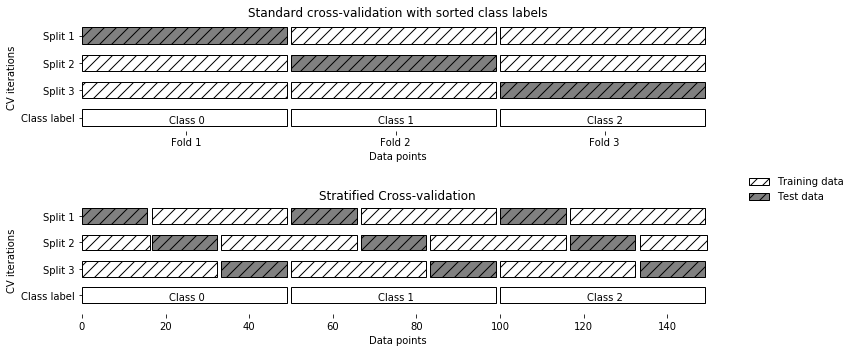

In [16]:
mglearn.plots.plot_stratified_cross_validation()

- 통상적으로 분류에서는 계층별 k-겹 교차검증일 이용하고, 회귀에는 단순한 k-겹 교차검증을 적용한다. 
- 예를 들어 샘플 90%가 클래스 A이고 10%가 B이면 계층별 교차 검증은 각 폴드에 클래스 A샘플이 90%, 클래스 B 샘플이 10%가 되도록 만든다.

- 사이킷 런의 cv 매개변수에 교차 검증 분할기를 전달함으로 데이터를 더 세밀하게 제어 가능하다. 

In [17]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print('교차검증 점수 :\n', cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차검증 점수 :
 [1.         0.93333333 0.43333333 0.96666667 0.43333333]


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

In [19]:
#iris 데이터 셋에 기본 k-겹 교차검증 이용이 좋은 방법이 아닌 것을 확인하는 예제
kfold=KFold(n_splits=3)
print('교차검증 점수 :\n', cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차검증 점수 :
 [0. 0. 0.]


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 각 폴드는 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습 할 수 가 없다. 
- 계층별 폴드를 만드는 대신, 데이터를 섞어서 샘플의 순서를 섞는 방법 도 있다. 
  
  ( KFold의 shuffle 매개변수를 True로 설정 해주면 된다. 데이터를 섞을시 random_state를 고정시켜 똑같은 작업 재현 가능 )

In [20]:
kfold=KFold(n_splits=3, shuffle = True, random_state = 0)
print('교차검증 점수 :\n', cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차검증 점수 :
 [0.9  0.96 0.96]


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

- 또다른 교차검증 방법으로는 LOOCV(Leave-one-out cross-validation)도 자주 사용한다.
- LOOCV교차검증은 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차검증으로 생각 할 수 있다. 
- 각 반복에서 하나의 데이터 포인트를 선택해 테스트 셋으로 이용. 

  ( 데이터 셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 더 좋은 결과를 만들어내기도 한다. )

In [24]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print('교차 검증 분할 횟수 :', len(scores))
print('평균 정확도 : ', scores.mean())

교차 검증 분할 횟수 : 150
평균 정확도 :  0.9533333333333334


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

임의 분할 교차 검증

- 매우 유연한 또 하나의 교차 검증 전략
- train_size 만큼의 포인트로 훈련 세트를 만들고, test_size(train과 중첩 X)만큼의 포인트로 테스트 셋을 만든다.
- n_splits횟수 만큼 분할을 반복한다.
- 밑의 그림에서는 샘플 10개인 데이터셋을 5개 포인트의 훈련, 2개 포인트의 테스트 셋으로 4번 반복하여 나눈것을 보여준다.

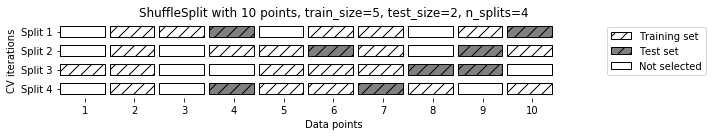

In [25]:
mglearn.plots.plot_shuffle_split()

In [28]:
#데이터셋의 50%를 훈련 세트, 50%를 테스트 세트로 10번 반복 분할
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.96       0.96       0.93333333 0.92       0.94666667 0.92
 0.94666667 0.97333333 0.82666667 0.90666667]


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

- 임의 분할 교차 검증은 반복 횟수를 훈련 셋, 테스트 셋의 크기와 독립적으로 조절할때 유용
- shufflesplit의 계층별 버전으로 StratifiedShuffleSplit도 있다.

그룹별 교차 검증 
- 데이터 안에 매우 연관된 그룹이 있을 때도 교차 검증 널리 이용
- GroupKFold의 groups 배열은 훈련, 테스트 셋 생성시 분리되지 않아야 할 그룹을 지정하는 것이다.
  
  ( 각 분할에서 한 그룹 전체가 훈련 세트 아니면 테스트 세트에 존재 )

In [29]:
from sklearn.model_selection import GroupKFold

#인위적 데이터 생성
X, y = make_blobs(n_samples = 12, random_state = 0)
#처음 3개는 같은 그룹, 다음은 4개 샘플이 같다. 
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수 ', scores)

교차 검증 점수  [0.75       0.8        0.66666667]


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

- 샘플 데이터를 그룹으로 정렬할 필요는 없으며, 그룹 레이블을 기반으로 계산한다. (밑의 예시 확인 )

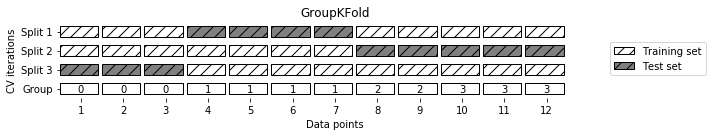

In [30]:
mglearn.plots.plot_group_kfold()

반복 교차검증

- 데이터셋의 크기가 크지 않은 경우 안정된 검증 점수 획득 위해 교차검증을 여러번 수행하는 경우가 많다.
- 이경우 RepeatedKFold, RepeatedStratifiedKFold 분할기 이용하면 된다. 
- 이 클래스를 cv매개변수에 전달하여 반복 가능하다. 
- 반복횟수는 n_repeats 매개변수로 설정하며 기본값은 10이다. ( 반복할때마다 데이터를 섞는다. )

In [32]:
iris = load_iris()
logreg = LogisticRegression()

from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state= 42)
scores = cross_val_score(logreg, iris.data, iris.target, cv = rskfold)

print('교차검증 점수 ', scores)
print('교차검증 평균 점수 ', scores.mean())

교차검증 점수  [0.96666667 0.96666667 0.96666667 0.93333333 0.96666667 0.86666667
 0.96666667 0.96666667 0.93333333 0.96666667 1.         1.
 0.93333333 0.93333333 0.93333333 1.         0.96666667 0.96666667
 0.9        0.96666667 0.96666667 0.96666667 1.         0.9
 0.96666667 0.93333333 1.         0.96666667 0.96666667 0.93333333
 0.96666667 0.93333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.93333333 0.93333333 0.96666667 1.         0.96666667 0.96666667
 0.86666667 1.         0.93333333 1.         0.96666667 1.
 0.93333333 0.9       ]
교차검증 평균 점수  0.9566666666666666


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur